# Linear regression

Import all the modules you will need in this notebook here:

In [2]:
# exercise 0
# Put your solution here!
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import abline_plot
import pandas as pd


We continue analysing the `fram` heart disease data.

First load the data, use the name `fram` for the DataFrame variable. Make sure that in the data you loaded the column and row headers are in place. Checkout the summary of the variables using the `describe` method.

In [3]:
# exercise 1
def get_path(filename):
    import sys
    import os
    prog_name = sys.argv[0]
    if os.path.basename(prog_name) == "__main__.py":   # Running under TMC
        return os.path.join(os.path.dirname(prog_name), "..", "src", filename)
    else:
        return filename
    
# Put your solution here!
fram = pd.read_csv(get_path("fram.txt"),sep="\t",header=0)
fram.describe()

,ID,AGE,FRW,SBP,SBP10,DBP,CHOL,CIG,CHD,DEATH,YRS_DTH
count,1394.000000,1394.000000,1394.000000,1394.000000,767.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000,1394.000000
mean,4737.184362,52.431133,105.365136,148.086083,148.040417,90.135581,234.644907,8.029412,1.187948,1.700861,16.219512
std,1073.406896,4.781507,17.752489,28.022062,25.706664,14.226235,46.303822,11.584138,2.615976,3.203132,3.921413
min,1070.000000,45.000000,52.000000,90.000000,94.000000,50.000000,96.000000,0.000000,0.000000,0.000000,1.000000
25%,3890.250000,48.000000,94.000000,130.000000,130.000000,80.000000,200.000000,0.000000,0.000000,0.000000,18.000000
50%,4821.000000,52.000000,103.000000,142.000000,145.000000,90.000000,230.000000,0.000000,0.000000,0.000000,18.000000
75%,5641.750000,56.000000,114.000000,160.000000,160.000000,98.000000,264.000000,20.000000,0.000000,0.000000,18.000000
max,6442.000000,62.000000,222.000000,300.000000,264.000000,160.000000,430.000000,60.000000,10.000000,10.000000,18.000000


Create function `rescale` that takes a Series as parameter. It should center the data and normalize it by dividing
by 2$\sigma$, where $\sigma$ is the standard deviation. Return the rescaled Series.

In [4]:
# exercise 2
# Put your solution here!
def rescale(series):
    series = series-np.mean(series)
    series = series/(2*series.std())
    return series

Add to the DataFrame the scaled versions of all the continuous variables (with function `rescale`). Add small letter `s` in front of the original variable name to get the name of the scaled variable. For instance, `AGE` -> `sAGE`.

In [5]:
# exercise 3
# Put your solution here!
fram["sAGE"] = rescale(fram.AGE)
fram["sFRW"] = rescale(fram.FRW)
fram["sSBP"] = rescale(fram.SBP)
fram["sDBP"] = rescale(fram.DBP)
fram["sCHOL"] = rescale(fram.CHOL)
fram["sCIG"] = rescale(fram.CIG)


Form a model that predicts systolic blood pressure using weight, gender, and cholesterol level as explanatory variables. Store the fitted model in variable named `fit`.

In [6]:
# exercise 4
# Put your solution here!
fit = smf.ols("SBP ~ sFRW + SEX + sCHOL", data = fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     66.37
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           4.13e-40
Time:                        02:17:10   Log-Likelihood:                -6530.4
No. Observations:                1394   AIC:                         1.307e+04
Df Residuals:                    1390   BIC:                         1.309e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.0199      0.985    152.336      0.000     148.088     151.952
SEX[T.male]    -4.0659      1.451     -2.803      0.005      -6.912      -1.220
sFRW           17.7205      1.426     12.431      0.000      14.924      20.517
sCHOL           4.9169      1.431      3.436      0.001       2.110       7.724
==============================================================================
Omnibus:                      327.612   Durbin-Watson:                   1.774
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.676
Skew:                           1.237   Prob(JB):                    6.28e-184
Kurtosis:                       5.899   Cond. No.                         2.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Add the variable AGE to the model and inspect the estimates of the coefficients using the `summary` method of the fitted model. Again use the name `fit` for the fitted model. (From now on assume that we always use the name `fit` for the variable of the fitted model.)

In [16]:
# exercise 5
# Put your solution here!
fit = smf.ols("SBP ~ sFRW + SEX + sAGE + sCHOL", data = fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     59.39
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           2.44e-46
Time:                        16:06:34   Log-Likelihood:                -6513.6
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1389   BIC:                         1.306e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     150.1695      0.974    154.221      0.000     148.259     152.080
SEX[T.male]    -4.3805      1.435     -3.053      0.002      -7.195      -1.566
sFRW           16.9771      1.415     11.999      0.000      14.202      19.753
sAGE            8.1332      1.400      5.810      0.000       5.387      10.879
sCHOL           4.2696      1.419      3.009      0.003       1.486       7.053
==============================================================================
Omnibus:                      321.087   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.955
Skew:                           1.206   Prob(JB):                    2.45e-183
Kurtosis:                       5.944   Cond. No.                         2.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How much does the inclusion of age increase the explanatory power of the model? Which variables explain the variance of the target variable most?

***
The second model has an R^2 value of 0.146, which is greater than the first model's R^2 value of 0.125, which is an improvement of 17%. R^2, the coefficient of determination, expresses the amount of variance in the data that is explained by our model. The higher this value is, the better our model fits the given sample.

As we have used the rescale function to normalize our variables, we can compare the respective coefficients in the model summary. The variable with the highest absolute coefficient is sFRW, so it is the variable which explains the variance of the target variable the most with age being the second most important explanatory variable in this model.

***

Try to add to the model all the interactions with other variables. 

In [12]:
# exercise 6
# Put your solution here!
fit = smf.ols(formula="SBP ~ sFRW + SEX + sAGE + sCHOL + sFRW:sAGE + sFRW:SEX + sCHOL:sAGE + sCHOL:SEX + sCHOL:sFRW + sAGE:SEX", data = fram).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SBP   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     24.52
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           4.92e-43
Time:                        02:33:48   Log-Likelihood:                -6509.9
No. Observations:                1394   AIC:                         1.304e+04
Df Residuals:                    1383   BIC:                         1.310e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           150.5439      1.001    150.355      0.000     148.580     152.508
SEX[T.male]          -4.7309      1.451     -3.261      0.001      -7.577      -1.885
sFRW                 16.6450      1.723      9.660      0.000      13.265      20.025
sFRW:SEX[T.male]      1.6673      3.088      0.540      0.589      -4.390       7.725
sAGE                 10.2189      2.003      5.101      0.000       6.289      14.149
sAGE:SEX[T.male]     -4.2923      2.886     -1.488      0.137      -9.953       1.368
sCHOL                 3.6181      1.878      1.926      0.054      -0.066       7.302
sCHOL:SEX[T.male]     1.0231      2.933      0.349      0.727      -4.730       6.776
sFRW:sAGE            -2.0866      2.803     -0.744      0.457      -7.585       3.412
sCHOL:sAGE           -4.7564      3.044     -1.563      0.118     -10.728       1.215
sCHOL:sFRW            4.9729      2.718      1.829      0.068      -0.359      10.305
==============================================================================
Omnibus:                      313.112   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.290
Skew:                           1.185   Prob(JB):                    6.10e-175
Kurtosis:                       5.863   Cond. No.                         6.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then visualize the model as the function of weight for the youngest (sAGE=-1.0), middle aged (sAGE=0.0), and oldest (sAGE=1.0) women while assuming the background variables to be centered. Remember to consider the changes in the intercept and in the regression coefficient caused by age. Visualize both the data points and the fitted lines.

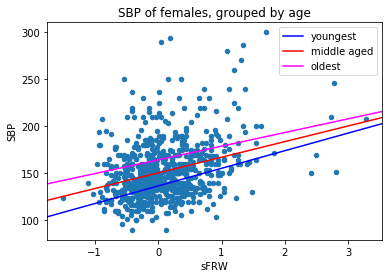

In [9]:
# exercise 7
# Put your solution here!
p=fit.params
fram[fram.SEX=="female"].plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"] - p["sAGE"], slope=p["sFRW"] - p["sFRW:sAGE"],
ax=plt.gca(), color="blue", label="youngest")
abline_plot(intercept=p.Intercept , slope=p["sFRW"],
ax=plt.gca(), color="red", label="middle aged")
abline_plot(intercept=p.Intercept + p["sCHOL"] + p["sAGE"], slope=p["sFRW"] + p["sFRW:sAGE"],
ax=plt.gca(), color="magenta", label="oldest")

plt.title("SBP of females, grouped by age")
plt.legend()



How does the dependence of blood pressure on weight change as a person gets older?
***

From the graph we can clearly see that the slope of the linear regression gets smaller as you go from the youngest category to the oldest. That is, the younger you are, the more your blood pressure is explained by your weight and vice versa. We also see that the older you are the higher your blood-pressure is in general.

The higher intercept for older people makes sense, since the more time there is for fatty tissues to build-up in the arteries the higher your blood pressure will become as the built up material starts blocking blood-flow. As time goes on, there is also a higher chance of other non-weight related health-issues that cause higher blood-pressure. This also explains the reason why the explanatory power of bodyweight becomes less important as one gets older. There are fewer ways in which a young person can get higher blood-pressure than someone who has lived longer.

***

### Even more accurate model

Include the background variable `sCIG` from the data and its interactions. Visualize the model for systolic blood pressure as the function of the most important explanatory variable. Visualize separate lines for the small (-1.0), average (0.0), and large (1.0) values of `sCHOL`. Other variables can be assumed to be at their mean value.

OLS Regression Results                            
Dep. Variable:                    SBP   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     16.50
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           2.99e-40
Time:                        02:31:20   Log-Likelihood:                -6508.6
No. Observations:                1394   AIC:                         1.305e+04
Df Residuals:                    1378   BIC:                         1.313e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           151.3182      1.160    130.456      0.000     

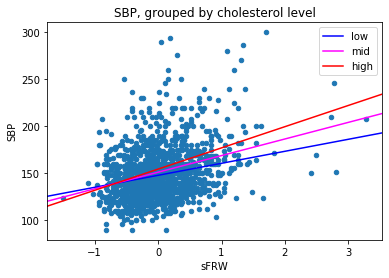

In [11]:
# exercise 8
# Put your solution here!
fit = smf.ols(formula="SBP ~ sFRW + SEX + sAGE + sCHOL + sCIG + sFRW:sCIG + sAGE:sCIG + sCHOL:sCIG + sFRW:sAGE + sFRW:SEX + sCHOL:sAGE + sCHOL:SEX + sCHOL:sFRW + sAGE:SEX +sCIG:SEX", data = fram).fit()
p=fit.params
print(fit.summary())
# We choose sFRW as we see in the OLS Regression Results that its coefficients absolute value is the highest among the explanatory variables. 
fram.plot.scatter("sFRW", "SBP")
abline_plot(intercept=p.Intercept - p["sCHOL"], slope=p.sFRW - p["sCHOL:sFRW"],
ax=plt.gca(), color="blue", label="low")
abline_plot(intercept=p.Intercept, slope=p.sFRW,
ax=plt.gca(), color="magenta", label="mid")
## CHANGE
abline_plot(intercept=p.Intercept + p["sCHOL"], slope=p.sFRW + p["sCHOL:sFRW"],
ax=plt.gca(), color="red", label="high")
plt.title("SBP, grouped by cholesterol level")
plt.legend()
plt.show()



How does the model and its accuracy look?

***
In general the model does help explain the variance of systolic blood pressure in the data, but the R^2 is relatively low, which implies that this model does not capture fully all the interactions that impact SBP. 

The adjusted R^2 measures for the accuracy of the model adjusting for how many variables are used in the model. As we can see, comparatively to our earlier models, the regular R^2 value is higher, as one could expect as more variables to consider can give more insight into the data. The difference is miniscule however, and can not be used for arguing for the inclusion of these variables in the model. This is because the adjusted R^2 is lower than in our earlier models (ex 5,6) with fewer variables, this means that the model is only about as accurate as the earlier models while including more variables in the calculation, which indicates that the new included variables are not useful in explaining the variance in the data. This is also supported by the high P-values of some of the variables included in this model.
***

# Logistic regression

In [72]:
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

We will continue predicting high blood pressure by taking in some continuous background variables, such as the age.

Recreate the model `HIGH_BP ~ sFRW + SEX + SEX:sFRW` presented in the introduction. Make sure, that you get the same results. Use name `fit` for the fitted model. Compute and store the error rate into variable `error_rate_orig`.

In [27]:
# exercise 9
# Put your solution here!
fram["HIGH_BP"] = (fram.SBP >= 140) | (fram.DBP >= 90)
fram.HIGH_BP = fram.HIGH_BP.astype("int")
print(np.mean(fram[((fram.SEX=="female") & (fram.sAGE > 0))].HIGH_BP))
print(np.mean(fram[((fram.SEX=="male") & (fram.sAGE > 0))].HIGH_BP))

fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + SEX:sFRW", data=fram,
family=sm.families.Binomial()).fit()
fit.summary()
error_rate_orig = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP) |
((fit.fittedvalues > 0.5) & ~fram.HIGH_BP))
error_rate_orig


0.736231884057971
0.6211180124223602


0.35581061692969873

Add the `sAGE` variable and its interactions. Check the prediction accuracy of the model and compare it to the previous model. Store the prediction accuracy to variable `error_rate`.

In [46]:
# exercise 10
# Put your solution here!
fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + sAGE:SEX + sFRW:sAGE + SEX:sFRW", data=fram,
family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.HIGH_BP)|(fit.fittedvalues>0.5)&~fram.HIGH_BP)
error_rate

0.3278335724533716

Visualize the predicted probability of high blood pressure as the function of weight. Remember to use normalized values (`rescale`) also for those variables that are not included in the visualization, so that sensible values are used for them (data average). Draw two figures with altogether six curves: young, middle aged, and old women; and young, middle aged, and old men. Use `plt.subplots`. (Plotting works in similar fashion as in the introduction. The argument factors need, however, be changed as in the example about visualisation of continuous variable.) 

Intercept           0.807929
SEX[T.male]        -0.198273
sFRW                1.019648
SEX[T.male]:sFRW    0.375389
sAGE                0.600800
sAGE:SEX[T.male]   -0.572700
sFRW:sAGE          -0.758808
dtype: float64


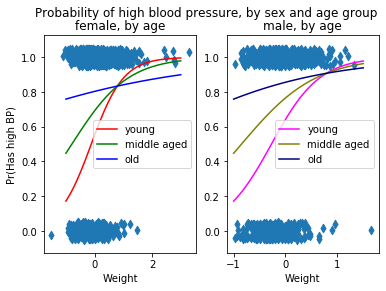

In [54]:
# exercise 11

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

# Put your solution here!
#adjust plots to be larger
p = fit.params
print(p)

fig, ax = plt.subplots(1,2)
fig.suptitle("Probability of high blood pressure, by sex and age group")

X=np.linspace(-1, 3, 100)
ax[0].scatter(fram.sFRW[(fram.SEX=="female")], fram.HIGH_BP[fram.SEX=="female"] + np.random.uniform(-0.05, 0.05, len(fram[(fram.SEX=="female")])),marker="d")
ax[0].set_xlabel("Weight")
ax[0].set_ylabel("Pr(Has high BP)")
ax[0].plot(X, logistic(X*(p.sFRW-p["sFRW:sAGE"]) + p.Intercept - p.sAGE), color="red", label="young")
ax[0].plot(X, logistic(X*(p.sFRW) + p.Intercept), color="green", label="middle aged")
ax[0].plot(X, logistic(X*(p.sFRW+p["sFRW:sAGE"]) + p.Intercept + p.sAGE), color="blue", label="old")
ax[0].set_title("female, by age")
ax[0].legend()

X=np.linspace(-1, 1.5, 100)
ax[1].scatter(fram.sFRW[(fram.SEX=="male")],fram.HIGH_BP[fram.SEX=="male"] + np.random.uniform(-0.05, 0.05, len(fram[(fram.SEX=="male")])),marker="d")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]-p["sFRW:sAGE"]) + p.Intercept - p.sAGE + p["SEX[T.male]:sFRW"]), color="magenta", label="young")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]) + p.Intercept + p["SEX[T.male]:sFRW"]), color="olive", label="middle aged")
ax[1].plot(X, logistic(X*(p.sFRW + p["SEX[T.male]:sFRW"]+p["sFRW:sAGE"]) + p.Intercept + p.sAGE + p["SEX[T.male]:sFRW"]), color="navy", label="old")
ax[1].set_xlabel("Weight")
ax[1].set_title("male, by age")
ax[1].legend()

plt.show()


How do the models with different ages and genders differ from each other?

***
As expected, the youngest age group has the lowest probability of having high blood pressure regardless of their sex, when their weight is below average or within one sd of the mean. When weight deviates one sd from the mean young and middle-aged people, regardless of sex, have a higher chance of high blood pressure. That means the relationship between the age groups when weight is below +1 sd from the mean reverses as one's weight positively deviates more than 1 sd from the mean. For men the age groups do not differ much in their likelihood of having high blood pressure after a deviation of ca 1 sd, whereas for women this effect is much more pronounced and younger women of higher weight tend to have a much higher chance of high blood pressure than older women and middle aged women. 

Females seem to have a higher probability of high blood pressure than men, regardless of age group. Men's probability of having high blood pressure seems less dependent on their weight than women's as is indicated by the more steep curve for women in comparison to men of the same age group. 
***

Create here a helper function `train_test_split` that gets a DataFrame as parameter and return a pair of DataFrames: one for training and the second for testing. 
The function should get parameters in the following way:
```python
train_test_split(df, train_fraction=0.8)
```
The data should be split randomly to training and testing DataFrames so that `train_fraction` fraction of data should go into the training set. Use the `sample` method of the DataFrame.

In [30]:
# exercise 12
# Put your solution here!
def train_test_split(df,train_fraction=0.8):
    trainSet = df.sample(frac=train_fraction)
    test = df.drop(trainSet.index)
    return trainSet, test

Check the prediction accuracy of your model using cross validation. Use 100-fold cross validation and training_fraction 0.8.

In [31]:
# exercise 13
np.random.seed(1)
# Put your solution here!
error_model = []
for i in range(100):
    train, test = train_test_split(fram)
    fit = smf.glm(formula="HIGH_BP ~ sFRW + SEX + sAGE + sAGE:SEX + sFRW:sAGE + SEX:sFRW", data=train, family=sm.families.Binomial()).fit()
    predicted = fit.predict(test)
    error_rate = np.mean(((predicted < 0.5) & test.HIGH_BP)|(predicted>0.5)&~test.HIGH_BP)
    error_model.append(error_rate)
print(pd.Series(error_model).mean())

0.3311827956989248


## Predicting coronary heart disease

Let us use again the same data to learn a model for the occurrence of coronary heart disease. We will use logistic regression to predict whether a patient *sometimes* shows symptoms of coronary heart disease. For this, add to the data a binary variable `hasCHD`, that describes the event (`CHD > 0`). The binary variable `hadCHD` can get only two values: 0 or 1. As a sanity check, compute the mean of this variable, which tells the number of positive cases.

In [41]:
# exercise 14
# Put your solution here!
fram["hasCHD"] = (fram.CHD > 0)
fram.hasCHD = fram.hasCHD.astype("int")

Next, form a logistic regression model for variable `hasCHD` by using variables sCHOL, sCIG, and sFRW, and their interactions as explanatory variables. Store the fitted model to variable `fit`. Compute the prediction accuracy of the model, store it to variable `error_rate`.

In [56]:
# exercise 15
# Put your solution here!
fit = smf.glm(formula="hasCHD ~ sCHOL + sCIG + sFRW + sCHOL:sCIG + sCHOL:sFRW + sFRW:sCIG", data=fram,
family=sm.families.Binomial()).fit()
error_rate = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD)|(fit.fittedvalues>0.5)&~fram.hasCHD)
false_negative = np.mean(((fit.fittedvalues < 0.5) & fram.hasCHD))
false_positive = np.mean(((fit.fittedvalues>0.5)&~fram.hasCHD))
print(error_rate)
print(false_negative)
print(false_positive)

0.22022955523672882
0.21736011477761835
0.0028694404591104736


Visualize the model by using the most important explanator on the x axis. Visualize both the points (with `plt.scatter`)
and the logistic curve (with `plt.plot`).

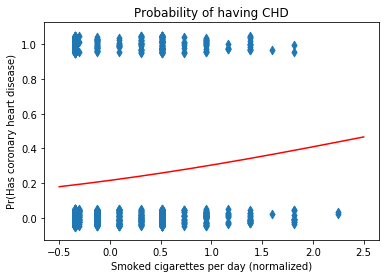

In [59]:
# exercise 16
def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))
# Put your solution here!
#find most important variable, since variables are rescaled, we can look at the coefficient
fit.summary()
#sCIG most important explanator
p = fit.params
X = np.linspace(-0.5,2.5,200)
plt.scatter(fram.sCIG,fram.hasCHD+np.random.uniform(-0.05,0.05,len(fram)),marker = "d")
plt.xlabel("Smoked cigarettes per day (normalized)")
plt.ylabel("Pr(Has coronary heart disease)")
plt.title("Probability of having CHD")
plt.plot(X, logistic(X*p.sCIG + p.Intercept), color="red")

Is the prediction accuracy of the model good or bad? Can we expect to have practical use of the model?
***
The error rate is 22%, with false negatives constituting for 99% of the errors. Although the model is better than pure chance, it is not good enough to guide the treatment of actual patients on its own. It can indicate people with high risk of heart disease, acting as a tool to for example guide doctors in selecting patients for further evaluation. Since we are talking about a treatable ailment, the price of inaction is higher than the price of unnecessary action, this makes the false negative rate unbearably high for even a model used for screening patients. 

Due to the seriousness of CHD, there is a lot of literature on this subject and more sophisticated models that can be used in the aforementioned practices. This model therefore has very little impact on the subject and due to its relative inaccuracy ought not to be used in a practical environment.
***

If a person has cholestherol 200, smokes 17 cigarets per day, and has weight 100, then what is the probability that he/she sometimes shows signs of coronal hear disease? Note that the model expects normalized values. Store the normalized values to dictionary called `point`. Store the probability in variable `predicted`.

In [44]:
# exercise 17
# Put your solution here!
nCHOL = (200 - fram.CHOL.mean())/(2*fram.CHOL.std())
nCIG = (17 - fram.CIG.mean())/(2*fram.CIG.std())
nFRW = (100-fram.FRW.mean())/(2*fram.FRW.std())
point = {"sCHOL": nCHOL,"sCIG": nCIG,"sFRW": nFRW}
predicted = fit.predict(point)[0]
predicted

0.2161616602504101